In [1]:
import numpy as np

import sys
from parallel import Parallel

sys.path.append('../..')
import plot_tools as pt
import matplotlib.pylab as plt
sys.path.append('../../analyz')
from analyz.signal_library.stochastic_processes import OrnsteinUhlenbeck_Process
from analyz.processing.signanalysis import autocorrel, crosscorrel

/home/yann.zerlaut/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


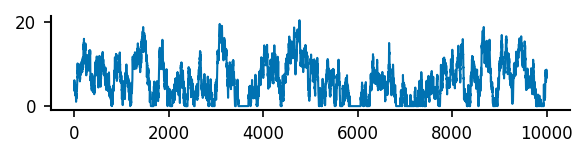

In [2]:
mean, sigma, tau = 5, 5, 10
tstop = 1000
dt = 0.1
OU = np.clip(OrnsteinUhlenbeck_Process(mean, sigma, tau, dt, tstop), 0, np.inf)

fig, ax = pt.figure(figsize=(2,1))
ax.plot(OU)

In [3]:
print(1e3*len(results['spikes'])/results['tstop'])

NameError: name 'results' is not defined

15.9


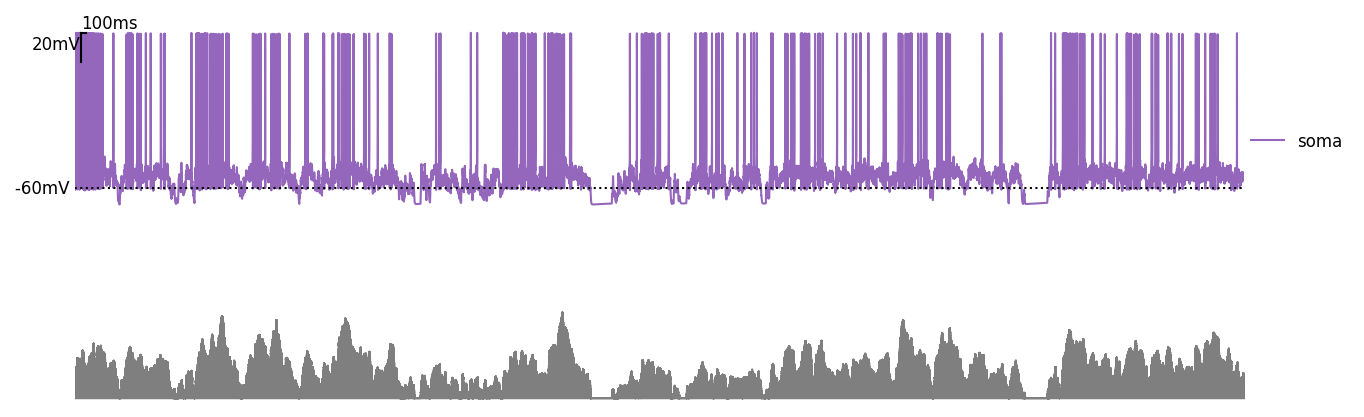

In [55]:
#results = np.load('../../data/detailed_model/demo-tvRate-Martinotti.npy', allow_pickle=True).item()
results = np.load('/tmp/tvRateStim_sim_Martinotti_iBranch_0_stochProcSeed_0_spikeSeed_0.npy', allow_pickle=True).item()
t = np.arange(len(results['Vm_soma']))*results['dt']
fig, AX = pt.figure(axes_extents=[[(1,2)],[(1,1)],[(1,1)]],
                    figsize=(3,1), left=0, bottom=0., hspace=0.)
AX[0].plot(t, results['Vm_soma'], 'tab:purple', label='soma')
AX[0].plot(t, -60+0*t, 'k:')
pt.annotate(AX[0], '-60mV ', (0,-60), xycoords='data', ha='right', va='center')
pt.draw_bar_scales(AX[0], Xbar=100, Xbar_label='100ms', Ybar=20, Ybar_label='20mV')
AX[0].legend(frameon=False, loc=(1, 0.3))

"""
for i, events in enumerate(results['presynaptic_exc_events']):
    AX[1].plot(events, i*np.ones(len(events)), '.', color='g', ms=.5)
for i, events in enumerate(results['presynaptic_inh_events']):
    AX[1].plot(events, len(results['presynaptic_exc_events'])+i*np.ones(len(events)), '.', 
               color='r', ms=.5)
pt.annotate(AX[1], 'Inh.', (0,1), ha='right', va='top', color='r')
pt.annotate(AX[1], 'Exc.', (0,0), ha='right', va='bottom', color='g')
"""

AX[2].fill_between(t[:-1], 0*t[:-1], results['OU'], color='tab:grey')
#AX[2].fplot(t[:1], results['OU'], color='tab:grey')

pt.set_common_xlims(AX, lims=[t[0], t[-1]])
for ax in AX:
    ax.axis('off')

print(1e3*len(results['spikes'])/results['tstop'])

(-1000.0, 1000.0)

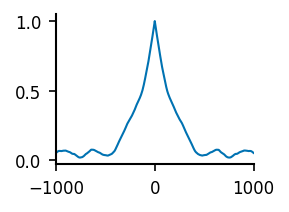

In [10]:
CCF, ts = crosscorrel(results['OU'][::4], results['OU'][::4], 1e3, 4*results['dt'])
plt.plot(ts, CCF)
plt.xlim([-1000,1000])

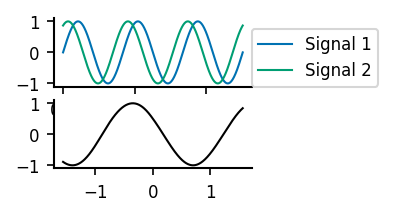

In [51]:
t = np.linspace(0, np.pi*2, int(1000))
Signal1 = np.sin(3*t)
Signal2 = np.cos(3*t-np.pi/6)
_, ax = plt.subplots(2)
ax[0].plot(t, Signal1, label='Signal 1')
ax[0].plot(t, Signal2, label='Signal 2')
ax[0].legend(loc=(1,0))
cr, t_shift = crosscorrel(Signal1, Signal2, np.pi/2., t[1]-t[0])
ax[1].plot(t_shift, cr, 'k-')

In [57]:
from scipy.ndimage import gaussian_filter1d

rate_smoothing = 5. # ms
RESULTS = {}

#cellType, color = 'Martinotti', 'tab:orange'
for cellType, color in zip(['Martinotti', 'Basket'], ['tab:orange']):

    sim = Parallel(\
            filename='../../data/detailed_model/tvRateStim_sim_%s.zip' % cellType)
    sim.load()

    sim.fetch_quantity_on_grid('spikes', dtype=list)

    seeds = np.unique(sim.stochProcSeed)
    nRepeats = int(np.product(sim.spikes.shape)/len(seeds))

    dt = sim.fetch_quantity_on_grid('dt', return_last=True)
    tstop = sim.fetch_quantity_on_grid('tstop', return_last=True)

    spikes_matrix= np.zeros((len(seeds), nRepeats, int(tstop/dt)+1))
    RESULTS['%s_rates' % cellType] = []
    for s, seed in enumerate(seeds):
        for i, spikes in enumerate(sim.spikes[sim.stochProcSeed==seed]):
            print(spikes.shape)
            spikes_matrix[s,i,(spikes/dt).astype('int')] = True
        rate = 1e3*gaussian_filter1d(np.mean(spikes_matrix[s,:,:], axis=0)/dt,
                                     int(rate_smoothing/dt))
        RESULTS['%s_rates' % cellType].append(rate)
        print('seed', s, np.mean(rate))

    sim.fetch_quantity_on_grid('OU', return_last=True, dtype=np.ndarray)
    RESULTS['StochProc'] = []
    for s, seed in enumerate(seeds):
        RESULTS['StochProc'].append(sim.OU[sim.stochProcSeed==seed][0])

(318, 1)
(325, 1)
(322, 1)
(328, 1)
(315, 1)
(324, 1)
(340, 1)
(332, 1)
(341, 1)
(337, 1)
(105, 1)
(100, 1)
(111, 1)
(122, 1)
(105, 1)
(215, 1)
(225, 1)
(229, 1)
(232, 1)
(219, 1)
(155, 1)
(152, 1)
(159, 1)
(162, 1)
(152, 1)
(101, 1)
(103, 1)
(113, 1)
(119, 1)
(101, 1)
seed 0 10.43665362084964
(318, 1)
(325, 1)
(322, 1)
(328, 1)
(315, 1)
(324, 1)
(340, 1)
(332, 1)
(341, 1)
(337, 1)
(105, 1)
(100, 1)
(111, 1)
(122, 1)
(105, 1)
(215, 1)
(225, 1)
(229, 1)
(232, 1)
(219, 1)
(155, 1)
(152, 1)
(159, 1)
(162, 1)
(152, 1)
(101, 1)
(103, 1)
(113, 1)
(119, 1)
(101, 1)
seed 1 10.43665362084964


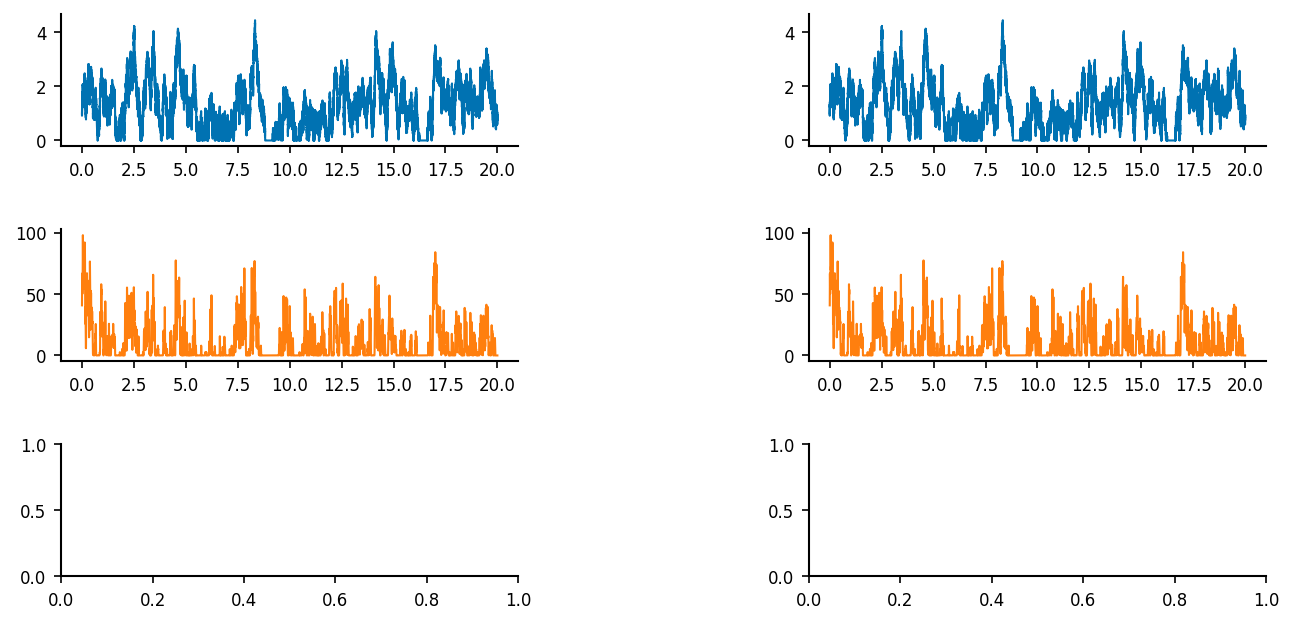

In [61]:
fig, AX = pt.figure(axes=(len(seeds),3), figsize=(2,1.4))

for s, seed in enumerate(seeds):
    AX[0][s].plot(t[:-1]/1e3, RESULTS['StochProc'][s])
    for c, cellType, color in zip(range(2), ['Martinotti', 'Basket'], ['tab:orange']):
        AX[1+c][s].plot(t/1e3, RESULTS['%s_rates' % cellType][s], color)

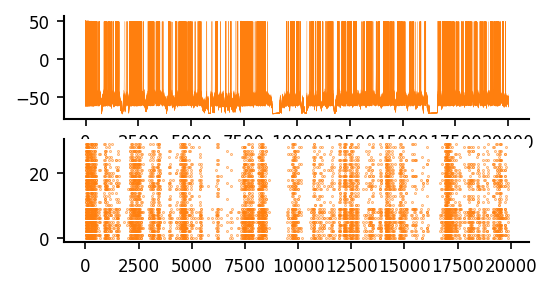

In [30]:
iSeed = 0

sim.fetch_quantity_on_grid('Vm_soma', dtype=list)

Spikes = []
fig, AX = plt.subplots(2, figsize=(4,2))

seed = 1

flat_seeds = sim.stochProcSeed.reshape(np.product(sim.stochProcSeed.shape))
cond = flat_seeds==seed

for i, vm in enumerate(sim.Vm_soma.reshape(np.product(sim.Vm_soma.shape))[cond]):
    t = np.arange(len(vm))*dt
    spikes = find_spikes(t, vm)
    AX[0].plot(t, vm, '-', lw=0.1, color=color)
    AX[1].plot(spikes, i+0*spikes, '.', color=color, ms=0.5)
    Spikes.append(spikes)

In [11]:
spikes_matrix= np.zeros((len(Spikes), int(tstop/dt)+1))
for i, spikes in enumerate(Spikes):
    spikes_matrix[i,(spikes/dt).astype('int')] = True

NameError: name 'tstop' is not defined

7.0741578239693865

In [56]:
tstop = sim.fetch_quantity_on_grid('tstop', return_last=True)


In [57]:
OU = sim.fetch_quantity_on_grid('OU', return_last=True, dtype=np.ndarray)

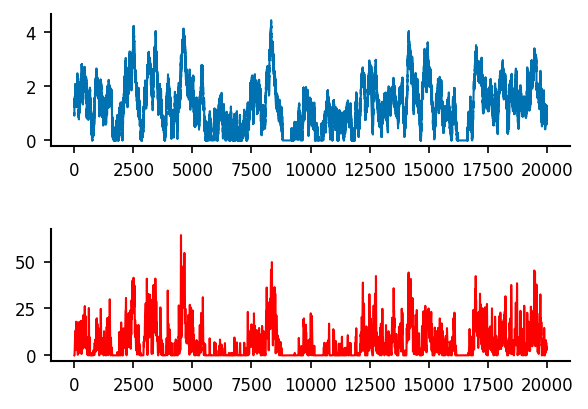

(-1000.0, 1000.0)

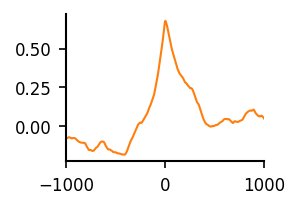

In [62]:
for c, cellType, color in zip(range(2), ['Martinotti', 'Basket'], ['tab:orange']):
    CCF, ts = crosscorrel(RESULTS['%s_rates' % cellType][s][1:][::5],
                          RESULTS['StochProc'][s][::5], 1e3, 5*dt)
    plt.plot(ts, CCF, color=color)
plt.xlim([-1000,1000])